# WeatherPy
----

# Observable Trends and Insights,

 1. The findings of these analysis showed that there is a higher temperature for cities that found near to the equator (Latitude 0), although when we go farther from the equator towards the north the temperature decreases. The regression analysis shows there is a strong negative correlation between temperature and latitude in the Northern Hemisphere. The correlation between temperature and latitude in the Southern Hemisphere is negative but very weak to conclude. 
   
 2. The findings from the data, plots, and the regression line in the case of testing if there is a relation between humidity and cloudiness of cities nearer or farther to the equator (latitude 0) doesn't show any significant results. The correlation between humidity and latitude for both northern and southern hemisphere cities is very week, negative correlation, and the result for cloudiness and latitude also very week and negative. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.
  
 3. The finding from the analysis of  the relationship between wind speed (mph) and latitude showed that the lower wind speed when the cities closer to the equater (latitude 0), and somehow the wind speed increase for the cities farther from the equater. The regression analysis also showed there is a very weak posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
# URL for Open Weather Map
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [52]:
# Initiate variables for response 

lat = []
lng = []
temp = []
temp_max = []
humidity = []
wind_speed = []
date = []
country = []
cloudiness = []

# Begin loop through list of cities
# Request data
print("Initiate Data Search")
print("--------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
        count = count + 1
        #Limit api calls
        if count == 51:
            count = 1
            set = set + 1
            time.sleep(5)
        print(f"Processing Record {count} of Set {set} | {city}")
        try:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            wind_speed.append(response['wind']['speed'])
            date.append(response['dt'])
            country.append(response['sys']['country'])
            cloudiness.append(response['clouds']['all'])
        except KeyError:
            print("City not found. Skipping...")
            lat.append(np.nan)
            lng.append(np.nan)
            temp.append(np.nan)
            temp_max.append(np.nan)
            humidity.append(np.nan)
            wind_speed.append(np.nan)
            date.append(np.nan)
            country.append(np.nan)
            cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Initiate Data Search
--------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | naryan-mar
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | tarakan
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | halalo
City not found. Skipping...
Processing Record 16 of Set 1 | brest
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | barrow
Processing

Processing Record 32 of Set 4 | salamanca
Processing Record 33 of Set 4 | chakwal
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | bethel
Processing Record 36 of Set 4 | sao filipe
Processing Record 37 of Set 4 | mazatlan
Processing Record 38 of Set 4 | teahupoo
Processing Record 39 of Set 4 | nakhon phanom
Processing Record 40 of Set 4 | cavalcante
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | ometepec
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | douentza
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | wanning
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | seoul
Processing Record 2 of Set 5 | talalayivka
Processing Record 3 of Set 5 | krasnyy klyuch
Processing Record 4 of Set 5 | san matias
Processing Record 5 of Set 5 | kendari

Processing Record 23 of Set 8 | hienghene
Processing Record 24 of Set 8 | kulhudhuffushi
Processing Record 25 of Set 8 | leh
Processing Record 26 of Set 8 | huarmey
Processing Record 27 of Set 8 | necochea
Processing Record 28 of Set 8 | presque isle
Processing Record 29 of Set 8 | umm kaddadah
Processing Record 30 of Set 8 | quzhou
Processing Record 31 of Set 8 | kumluca
Processing Record 32 of Set 8 | saint-leu
Processing Record 33 of Set 8 | devrek
Processing Record 34 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 8 | saint anthony
Processing Record 36 of Set 8 | kindu
Processing Record 37 of Set 8 | tecoanapa
Processing Record 38 of Set 8 | vargem grande do sul
Processing Record 39 of Set 8 | basco
Processing Record 40 of Set 8 | asosa
Processing Record 41 of Set 8 | kardailovo
Processing Record 42 of Set 8 | amderma
City not found. Skipping...
Processing Record 43 of Set 8 | the pas
Processing Record 44 of Set 8 | clyde river
Processing Record 45 of

Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | guerrero negro
Processing Record 14 of Set 12 | lichuan
Processing Record 15 of Set 12 | belmonte
Processing Record 16 of Set 12 | marystown
Processing Record 17 of Set 12 | slave lake
Processing Record 18 of Set 12 | puerto madryn
Processing Record 19 of Set 12 | vieques
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | laguna
Processing Record 22 of Set 12 | ladario
Processing Record 23 of Set 12 | taiyuan
Processing Record 24 of Set 12 | hualmay
Processing Record 25 of Set 12 | novyy yarychiv
Processing Record 26 of Set 12 | anito
Processing Record 27 of Set 12 | iquique
Processing Record 28 of Set 12 | hovd
Processing Record 29 of Set 12 | malwan
City not found. Skipping...
Processing Record 30 of Set 12 | murgab
Processing Record 31 of Set 12 | vitim
Processing Record 32 of Set 12 | durban
Processing Record 33 of Set 12 | nikolayevka
Processing Record 34 of Set 12 | southbridge
Proce

In [56]:
len(lat)
len(temp)

593

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
#Convert data to df
cities_df = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Exclude all cities that did not return data from Open Weather Map
cities_df = cities_df.dropna(how="any")
print(cities_df.count())

City          538
Latitude      538
Longitude     538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64


In [58]:
#Export to CSV
cities_df.to_csv("output_data/cities.csv")
#Display df
weather_df = pd.read_csv("output_data/cities.csv")
weather_df.head()

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,punta arenas,-53.1500,-70.9167,35.71,87.0,20.0,13.80,CL,1.635038e+09
1,1,jamestown,42.0970,-79.2353,45.01,95.0,90.0,1.99,US,1.635038e+09
2,2,victoria,22.2855,114.1577,74.25,75.0,24.0,5.01,HK,1.635038e+09
3,3,ushuaia,-54.8000,-68.3000,33.46,93.0,90.0,17.27,AR,1.635038e+09
4,5,busselton,-33.6500,115.3333,73.04,61.0,100.0,4.94,AU,1.635038e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

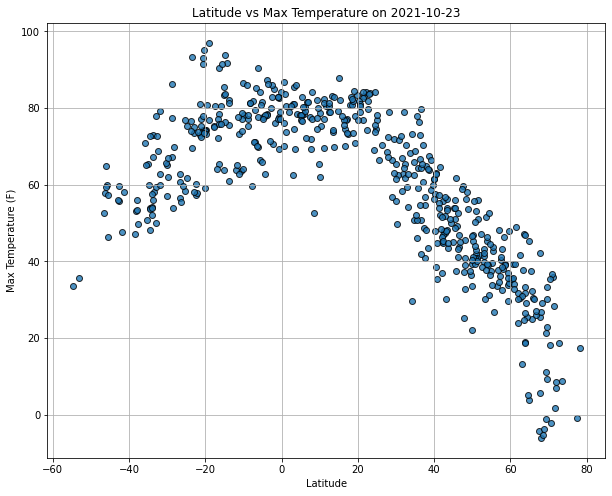

In [68]:
#Real time date
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs Max Temperature on {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

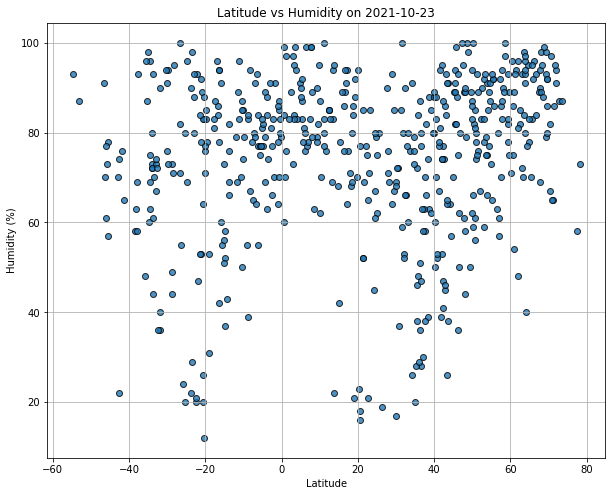

In [69]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs Humidity on {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

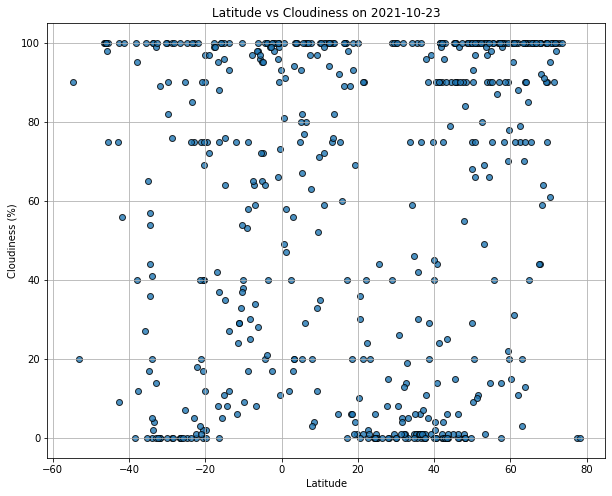

In [70]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs Cloudiness on {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

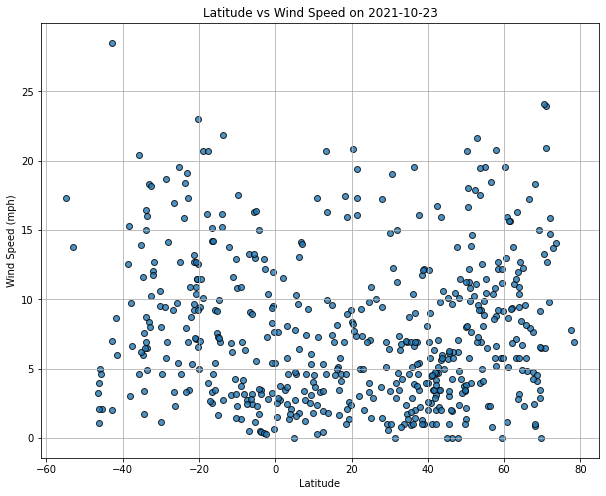

In [71]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed on {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [84]:
#Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [85]:
# Create Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7917335975915961
The correlation between both factors is -0.89


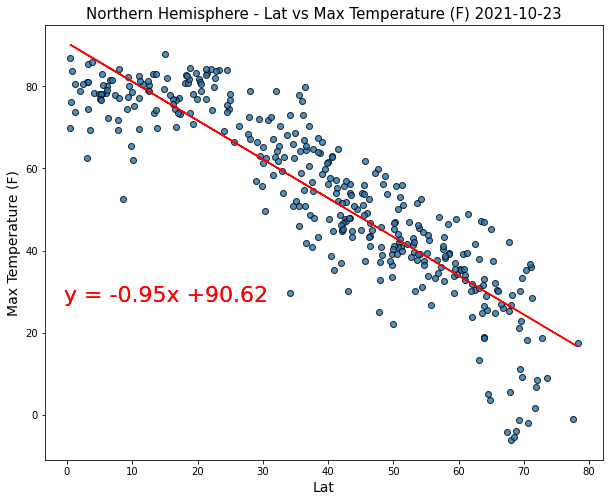

In [90]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temperature (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44481416620440384
The correlation between both factors is 0.67


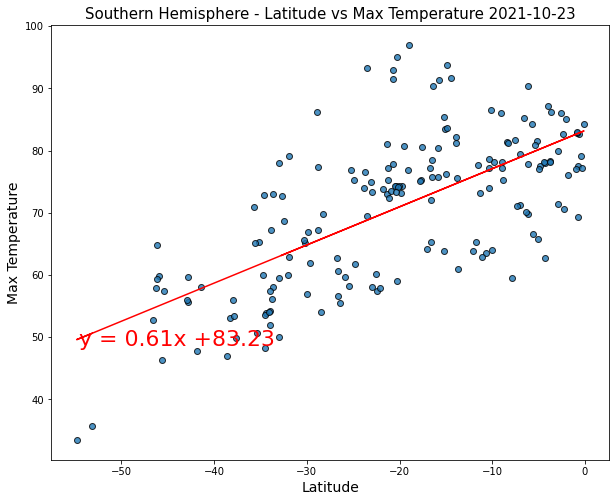

In [91]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temperature", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013595086723371116
The correlation between both factors is 0.12


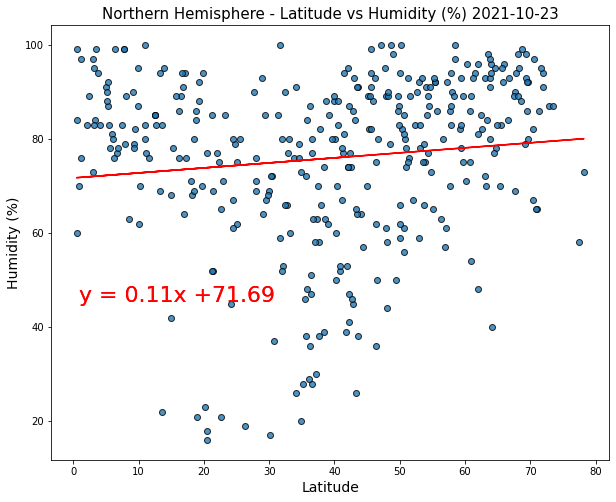

In [93]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013595086723371116
The correlation between both factors is 0.12


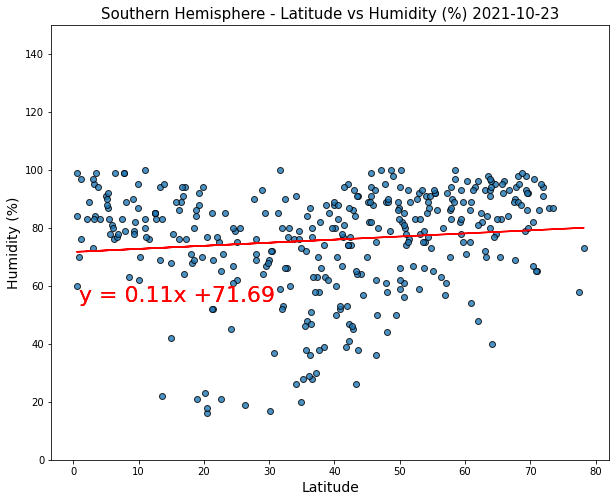

In [94]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.037735084533962605
The correlation between both factors is 0.19


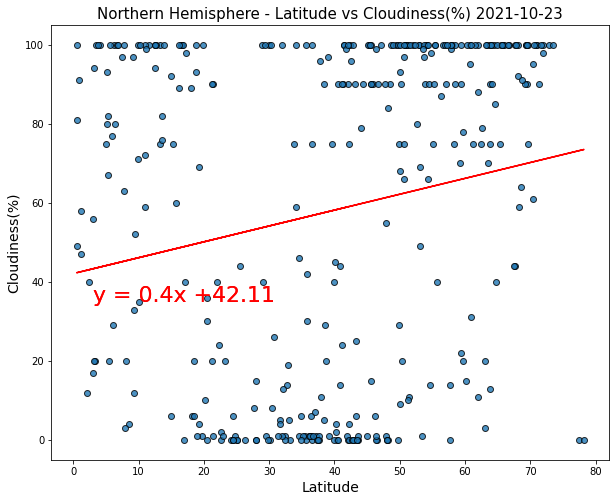

In [95]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010977982956108813
The correlation between both factors is 0.1


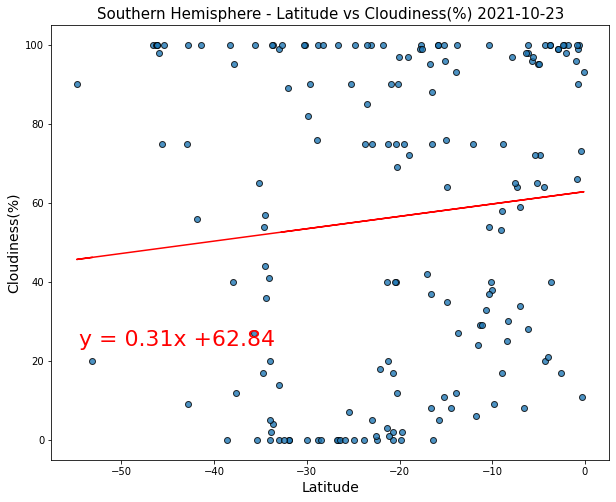

In [96]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06392297650263842
The correlation between both factors is 0.25


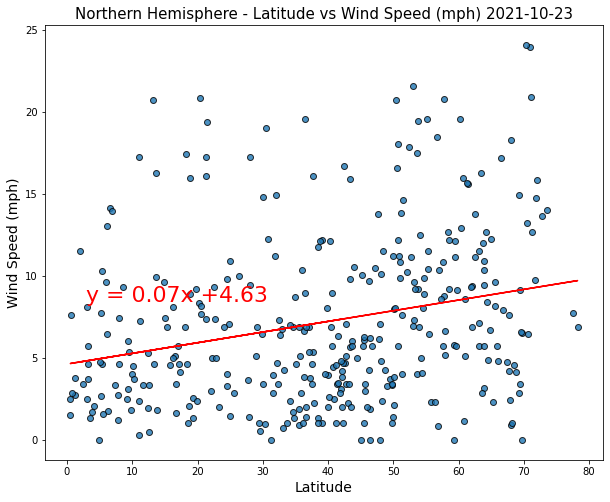

In [97]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027235467835756616
The correlation between both factors is -0.17


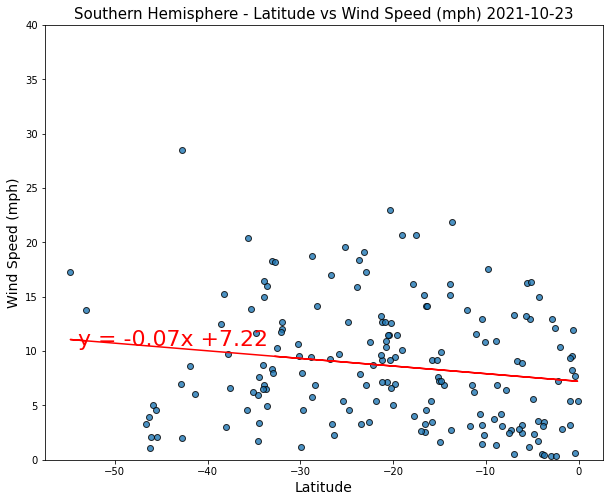

In [98]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()